Задание такое:
1. Проанализировать поведение пользователей за некоторый период: куда ходят, что смотрят, что делают, как долго / как глубоко смотрят, после чего уходят и другое.
2. Узкие или подозрительные места на сайте: к чему стоит присмотреться внимательнее (понаблюдать дальше), что пора поменять прямо сейчас (неудобно сделано) и др.
3. Идеи, какие данные сейчас не трекаются в GA, а следовало бы их трекать, потому что...

Будем анализировать период со 2 декабря 2020 года по 2 декабря 2021 года

In [29]:
# Импортируем нужные библиотеки
import pandas as pd
#import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Подгрузим сюда все excel файлы выкачанные из Google Analytics

In [5]:
# Таблица с пользователями
users = pd.read_excel('User_stats.xlsx', ['Users', 'Language', 'Age', 'Gender'])

# Таблица с устройствами и локацией и типом браузера
devices = pd.read_excel('Device_data.xlsx', ['DeviceType', 'BrowserType', 'Location'])

# Таблица с данными по поведению пользователей
behaviour = pd.read_excel('Behaviour.xlsx', ['Source', 'Depth', 'Duration', 'New_return', 'Periods', 'Pages', 'Active_users'])

Для начала изучим нашу целевую аудиторию

In [7]:
users['Users'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Идентификатор клиента       803 non-null    float64
 1   Сеансы                      803 non-null    int64  
 2   Сред. длительность сеанса   803 non-null    float64
 3   Показатель отказов          803 non-null    int64  
 4   Доход                       803 non-null    int64  
 5   Транзакции                  803 non-null    int64  
 6   Коэффициент конверсии цели  803 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 44.0 KB


В первом датафрейме у нас 803 уникальных пользователя. Заметим, что у нас нет пропущенных значений.
Теперь посмотрим, что у нас в самом датафрейме: выведем первые 5 строк

In [9]:
users['Users'].head()

,Идентификатор клиента,Сеансы,Сред. длительность сеанса,Показатель отказов,Доход,Транзакции,Коэффициент конверсии цели
0,1.198341e+09,41,155.878049,0,0,0,0.926829
1,3.397463e+08,22,280.000000,0,0,0,0.545455
2,1.764764e+09,20,106.300000,0,0,0,0.300000
3,5.091727e+08,11,0.545455,0,0,0,0.000000
4,2.067559e+09,8,0.750000,0,0,0,0.000000


При выгрузке с GA мы получаем сгруппированные датафреймы. В данном случае он сгруппирован по пользователю.
У нас есть столбцы с количеством сеансов, средняя длительность сеанса, показатель отказов, доход и транзакции.
Так же есть коэф-т конверсии цели, который в данным момент мы определить не можем и учитывать не будем.

Получим данные по основным стат показателям через describe()


In [11]:
users['Users'].describe()

,Идентификатор клиента,Сеансы,Сред. длительность сеанса,Показатель отказов,Доход,Транзакции,Коэффициент конверсии цели
count,8.030000e+02,803.000000,803.000000,803.000000,803.0,803.0,803.000000
mean,1.079216e+09,1.323786,46.170497,0.013699,0.0,0.0,0.156091
std,6.315912e+08,1.879080,180.566835,0.116309,0.0,0.0,0.460221
min,6.150793e+06,1.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,5.065441e+08,1.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,1.095813e+09,1.000000,10.000000,0.000000,0.0,0.0,0.000000
75%,1.638227e+09,1.000000,11.000000,0.000000,0.0,0.0,0.000000
max,2.147305e+09,41.000000,2150.500000,1.000000,0.0,0.0,4.000000


Ключевая статистика:

1. 1.32 сеанса на пользователя
2. 46.17 секунд средняя длительность сеанса.
3. 1.3% средний показатель отказов
4. У нас нет ни дохода ни транзакций за этот период времени

Важно: по текущим данным у нас есть отличие в средней продолжительности сеанса в гугл аналитике мы имеем 1 мин. 15 секунд, в то время как в выгруженных данных по пользователям у нас 46.17 секунд. Этот момент требует дальнейшего рассмотрения.






In [20]:
# Посчитаем долю пользователей имевших более 1 сеанса
users['Users'][users['Users']['Сеансы'] > 1]['Идентификатор клиента'].count()/users['Users']['Идентификатор клиента'].count()

0.14196762141967623

Т.е. доля пользователей имевших более 1 сеанса равна **14.2%**

Гипотеза: пользователи дальше начальной страницы не идут. Далее мы к этому вернемся, а пока продолжим изучать нашу ЦА


In [25]:
# Посмотрим на датафрейм language
users['Language'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Язык                                                  10 non-null     object 
 1   Пользователи                                          10 non-null     int64  
 2   Новые пользователи                                    10 non-null     int64  
 3   Сеансы                                                10 non-null     int64  
 4   Показатель отказов                                    10 non-null     float64
 5   Страниц/сеанс                                         10 non-null     float64
 6   Сред. длительность сеанса                             10 non-null     float64
 7   Visit Social nets (Коэффициент конверсии для цели 1)  10 non-null     float64
 8   Visit Social nets (Достигнутые переходы к цели 1)     10 non-nu

In [28]:
users['Language']

,Язык,Пользователи,Новые пользователи,Сеансы,Показатель отказов,Страниц/сеанс,Сред. длительность сеанса,Visit Social nets (Коэффициент конверсии для цели 1),Visit Social nets (Достигнутые переходы к цели 1),Visit Social nets (Ценность цели 1)
0,ru-ru,218,217,376,0.002660,3.686170,148.039894,0.018617,7,0
1,en-us,201,201,231,0.000000,2.103896,20.991342,0.000000,0,0
2,en-gb,96,96,109,0.000000,2.403670,29.541284,0.018349,2,0
3,zh-cn,85,85,90,0.111111,1.888889,0.511111,0.000000,0,0
4,ru,64,64,96,0.000000,3.177083,137.583333,0.052083,5,0
5,de,9,9,11,0.000000,2.000000,9.909091,0.000000,0,0
6,fr-fr,9,9,10,0.000000,2.000000,10.100000,0.000000,0,0
7,it-it,9,9,10,0.000000,2.000000,9.900000,0.000000,0,0
8,fr,8,8,8,0.000000,2.000000,9.875000,0.000000,0,0
9,de-de,7,7,8,0.000000,2.000000,10.500000,0.000000,0,0


In [110]:
users['Language']['Пользователи'].sum()

706

Данные:

1) Пользователей всего **706** из **803** - значит не у всех пользователей система определила язык.
 
2) Столбцы "Пользователи" и "Новые пользователи" практически ничем не отличаются (разница в 1 в одной строке)

3) Построим столбчатые диаграммы по Пользователям, Сеансам, Страниц/сеанс и Сред. длительность сеанса.

NOTE: Будем рассматривать только топ пять групп, так как остальные 5 занимают незначительную долю в целом.


Text(0.5, 1.0, 'Сеансы')

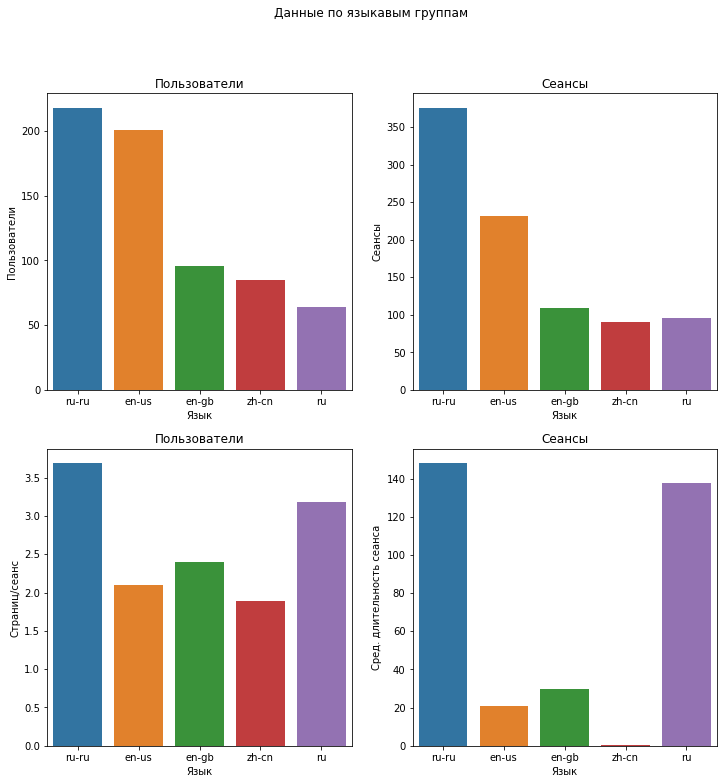

In [149]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Данные по языкавым группам')

sns.barplot(ax = axes[0, 0], x = 'Язык', y = 'Пользователи', data = users['Language'].head(5))
axes[0, 0].set_title('Пользователи')

sns.barplot(ax = axes[0, 1], x = 'Язык', y = 'Сеансы', data = users['Language'].head(5))
axes[0, 1].set_title('Сеансы')

sns.barplot(ax = axes[1, 0], x = 'Язык', y = 'Страниц/сеанс', data = users['Language'].head(5))
axes[1, 0].set_title('Пользователи')

sns.barplot(ax = axes[1, 1], x = 'Язык', y = 'Сред. длительность сеанса', data = users['Language'].head(5))
axes[1, 1].set_title('Сеансы')

In [147]:
# Доля пользователей с русским языком
rus = users['Language'][(users['Language']['Язык'] == 'ru-ru') | (users['Language']['Язык'] == 'ru')]['Пользователи'].sum()/803
eng = users['Language'][(users['Language']['Язык'] == 'en-us') | (users['Language']['Язык'] == 'en-gb')]['Пользователи'].sum()/803

print('{:.1%} - доля пользователей с русским языком \n{:.1%} - доля пользователей с английским языком'.format(rus, eng))




35.1% - доля пользователей с русским языком 
37.0% - доля пользователей с английским языком


Выводы по графике:
1) Как показывают рассчеты, английский язык занимает у нас большую долю от пользователей
2) Доля русского языка на 1.9% меньше.
3) Так как у нас из 803 пользователей язык не определен для 97. То окночательную пропорцию мы не знаем. Будем считать доли равными.
3) Последний язык - это китайский. Скорее всего пользователи попали по ошибке.


##### Возрастные группы

In [118]:
users['Age'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Возраст                                               4 non-null      object 
 1   Пользователи                                          4 non-null      int64  
 2   Новые пользователи                                    4 non-null      int64  
 3   Сеансы                                                4 non-null      int64  
 4   Показатель отказов                                    4 non-null      int64  
 5   Страниц/сеанс                                         4 non-null      float64
 6   Сред. длительность сеанса                             4 non-null      float64
 7   Visit Social nets (Коэффициент конверсии для цели 1)  4 non-null      float64
 8   Visit Social nets (Достигнутые переходы к цели 1)     4 non-null

In [123]:
users['Age']

,Возраст,Пользователи,Новые пользователи,Сеансы,Показатель отказов,Страниц/сеанс,Сред. длительность сеанса,Visit Social nets (Коэффициент конверсии для цели 1),Visit Social nets (Достигнутые переходы к цели 1),Visit Social nets (Ценность цели 1)
0,25-34,39,37,70,0,3.971429,229.671429,0.042857,3,0
1,18-24,27,25,43,0,3.720930,256.395349,0.000000,0,0
2,35-44,18,15,54,0,2.518519,75.574074,0.018519,1,0
3,45-54,14,14,18,0,3.444444,36.444444,0.055556,1,0


In [129]:
print('Доля пользователей попавших в возрастную группу от всего числа пользователей {:.1%}'.format(users['Age']['Пользователи'].sum()/803))

Доля пользователей попавших в возрастную группу от всего числа пользователей 12.2%


В возрастные группы у нас попало только **12.2%** пользователей от общего числа. Сейчас мы не можем однозначно выделить нашу целевую аудиторию по возрасту. Стоит предприянять шаги для отслеживания возраста, чтобы определить ЦА по возрасту.

##### Гендерные группы

In [130]:
users['Gender']

,Пол,Пользователи,Новые пользователи,Сеансы,Показатель отказов,Страниц/сеанс,Сред. длительность сеанса,Visit Social nets (Коэффициент конверсии для цели 1),Visit Social nets (Достигнутые переходы к цели 1),Visit Social nets (Ценность цели 1)
0,female,56,54,95,0,3.494737,114.778947,0.021053,2,0
1,male,54,53,113,0,3.433628,222.955752,0.035398,4,0


In [131]:
print('Доля пользователей попавших в гендерную группу от всего числа пользователей {:.1%}'.format(users['Gender']['Пользователи'].sum()/803))

Доля пользователей попавших в гендерную группу от всего числа пользователей 13.7%


Здесь мы тоже не можем однозначно сказать какое распределение по полу у нашей ЦА.
Но поскольку контент сайта не предполагает какую-то тематику, которая может быть интересна только одному полу. Мы эти данные использовать не будем

### Выводы по ЦА части

1. В среднем у нас **1.32** сеанса на пользователя
2. Английский и Русский языки имеют практически равные доли. Значит нам необходимо учитывать английскую аудиторию.
## 3. ЧЧЧЧЧЧЧЧЧЧЧЧЧЧЧЧЧЧЧЧЧЧЧЧЧ



###  Тип устройства 

In [152]:
devices['DeviceType']

,Тип устройства,Пользователи,Новые пользователи,Сеансы,Показатель отказов,Страниц/сеанс,Сред. длительность сеанса,Visit Social nets (Коэффициент конверсии для цели 1),Visit Social nets (Достигнутые переходы к цели 1),Visit Social nets (Ценность цели 1)
0,desktop,427,425,628,0.001592,2.861465,110.391720,0.017516,11,0
1,mobile,359,360,414,0.024155,2.657005,22.635266,0.007246,3,0
2,tablet,17,17,21,0.000000,2.380952,84.904762,0.000000,0,0


In [150]:
devices['DeviceType'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Тип устройства                                        3 non-null      object 
 1   Пользователи                                          3 non-null      int64  
 2   Новые пользователи                                    3 non-null      int64  
 3   Сеансы                                                3 non-null      int64  
 4   Показатель отказов                                    3 non-null      float64
 5   Страниц/сеанс                                         3 non-null      float64
 6   Сред. длительность сеанса                             3 non-null      float64
 7   Visit Social nets (Коэффициент конверсии для цели 1)  3 non-null      float64
 8   Visit Social nets (Достигнутые переходы к цели 1)     3 non-null

У нас нет пропущенных значений. Теперь посчитаем количество пользователей

In [151]:
devices['DeviceType']['Пользователи'].sum()

803

По типам устройств у нас все пользователи определены. Построим pie-диаграммы, чтобы оценить распределение

In [ ]:
labels1 = 'desktop', '2 раза', '3 и более'
sizes1 = [persent_one_start, persent_two_start, persent_three_start]
labels2 = '1 раз', '2 раза', '3 и более'
sizes2 = [persent_one_finish, persent_two_finish, persent_three_finish]

fig, axes = plt.subplots(1, 2, figsize=(5,5))
plt.subplots_adjust(bottom = -0.3, right = 3)
axes[0].set_title('Процент пользователей по количеству стартов обучения')
labels1 = '1 раз', '2 раза', '3 и более'
sizes1 = [persent_one_start, persent_two_start, persent_three_start]
axes[0].pie(sizes1, labels = labels1, autopct='%.2f%%',
       shadow=True, startangle=90)
axes[1].set_title('Процент пользователей по количеству завершений обучения')
axes[1].pie(sizes2, labels = labels2, autopct='%.2f%%',
        shadow=True, startangle=90)

Text(0.5, 1.0, 'Сеансы')

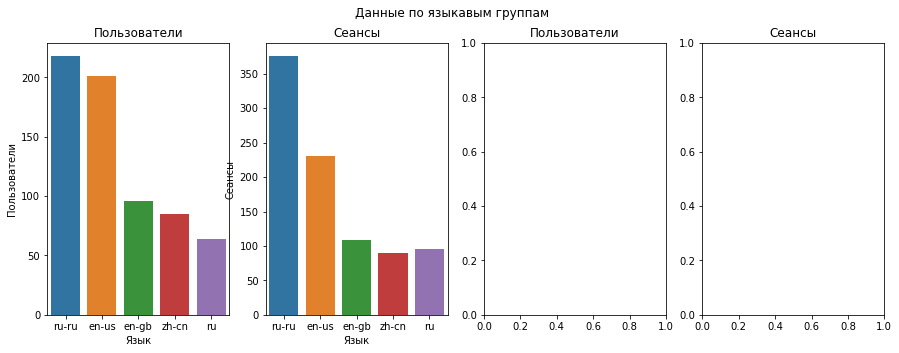

In [85]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Данные по языкавым группам')

sns.barplot(ax = axes[0], x = 'Язык', y = 'Пользователи', data = users['Language'].head(5))
axes[0].set_title('Пользователи')

sns.barplot(ax = axes[1], x = 'Язык', y = 'Сеансы', data = users['Language'].head(5))
axes[1].set_title('Сеансы')
#axes[1].set(yticklabels=[])

sns.barplot(ax = axes[0], x = 'Язык', y = 'Пользователи', data = users['Language'].head(5))
axes[2].set_title('Пользователи')

sns.barplot(ax = axes[1], x = 'Язык', y = 'Сеансы', data = users['Language'].head(5))
axes[3].set_title('Сеансы')




In [80]:
data['Набор данных1'].columns

Index(['Идентификатор клиента', 'Сеансы', 'Сред. длительность сеанса',
       'Показатель отказов', 'Доход', 'Транзакции',
       'Коэффициент конверсии цели'],
      dtype='object')

In [81]:
data.keys()

dict_keys(['Набор данных1'])

In [83]:
data['Набор данных1'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Идентификатор клиента       803 non-null    float64
 1   Сеансы                      803 non-null    int64  
 2   Сред. длительность сеанса   803 non-null    float64
 3   Показатель отказов          803 non-null    int64  
 4   Доход                       803 non-null    int64  
 5   Транзакции                  803 non-null    int64  
 6   Коэффициент конверсии цели  803 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 44.0 KB


In [76]:
data['Набор данных1']['Сред. длительность сеанса'] = data['Набор данных1']['Сред. длительность сеанса'].apply(lambda x: x.second)

In [89]:
data['Набор данных1'].describe()

,Идентификатор клиента,Сеансы,Сред. длительность сеанса,Показатель отказов,Доход,Транзакции,Коэффициент конверсии цели
count,8.030000e+02,803.000000,803.000000,803.000000,803.0,803.0,803.000000
mean,1.079216e+09,1.323786,46.170497,0.013699,0.0,0.0,0.156091
std,6.315912e+08,1.879080,180.566835,0.116309,0.0,0.0,0.460221
min,6.150793e+06,1.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,5.065441e+08,1.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,1.095813e+09,1.000000,10.000000,0.000000,0.0,0.0,0.000000
75%,1.638227e+09,1.000000,11.000000,0.000000,0.0,0.0,0.000000
max,2.147305e+09,41.000000,2150.500000,1.000000,0.0,0.0,4.000000
